In [353]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
import re
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel, RFECV
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score,recall_score,make_scorer,precision_score
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
import xgboost as xgb
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier

In [280]:
import pandas as pd

# قراءة الملف مع تخطي الأسطر الوصفية
KEPLER_FILE = pd.read_csv(
    "/content/TOI_2025.09.19_04.10.17.csv",
    comment='#',  # تجاهل كل الأسطر التي تبدأ بـ #
    sep=',',      # الفاصل الافتراضي، عدله إذا لازم
    engine='python'
)

# عرض أول 5 صفوف للتأكد
print(KEPLER_FILE.head())


   rowid      toi  toipfx        tid    ctoi_alias  pl_pnum tfopwg_disp  \
0      1  1000.01    1000   50365310  5.036531e+07        1          FP   
1      2  1001.01    1001   88863718  8.886372e+07        1          PC   
2      3  1002.01    1002  124709665  1.247097e+08        1          FP   
3      4  1003.01    1003  106997505  1.069975e+08        1          FP   
4      5  1004.01    1004  238597883  2.385979e+08        1          FP   

          rastr          ra  raerr1  raerr2         decstr        dec  \
0  07h29m25.85s  112.357708     NaN     NaN  -12d41m45.46s -12.695960   
1  08h10m19.31s  122.580465     NaN     NaN  -05d30m49.87s  -5.513852   
2  06h58m54.47s  104.726966     NaN     NaN  -10d34m49.64s -10.580455   
3  07h22m14.39s  110.559945     NaN     NaN  -25d12m25.26s -25.207017   
4  08h08m42.77s  122.178195     NaN     NaN  -48d48m10.12s -48.802811   

   decerr1  decerr2  st_pmra  st_pmraerr1  st_pmraerr2  st_pmralim  \
0      NaN      NaN   -5.964        0.08

In [281]:
import pandas as pd

# قراءة ملف Kepler
KEPLER_FILE = pd.read_csv(
    "/content/cumulative_2025.09.19_04.10.46.csv",  # ضع المسار الصحيح
    comment='#',  # تجاهل كل الأسطر التي تبدأ بـ #
    sep=',',      # فاصل الأعمدة
    engine='python'
)

# عرض أول 5 صفوف للتأكد
print(KEPLER_FILE.head())
""

   rowid     kepid kepoi_name   kepler_name koi_disposition koi_vet_stat  \
0      1  10797460  K00752.01  Kepler-227 b       CONFIRMED         Done   
1      2  10797460  K00752.02  Kepler-227 c       CONFIRMED         Done   
2      3  10811496  K00753.01           NaN       CANDIDATE         Done   
3      4  10848459  K00754.01           NaN  FALSE POSITIVE         Done   
4      5  10854555  K00755.01  Kepler-664 b       CONFIRMED         Done   

  koi_vet_date koi_pdisposition  koi_score  koi_fpflag_nt  koi_fpflag_ss  \
0   2018-08-16        CANDIDATE      1.000              0              0   
1   2018-08-16        CANDIDATE      0.969              0              0   
2   2018-08-16        CANDIDATE      0.000              0              0   
3   2018-08-16   FALSE POSITIVE      0.000              0              1   
4   2018-08-16        CANDIDATE      1.000              0              0   

   koi_fpflag_co  koi_fpflag_ec        koi_disp_prov  \
0              0              

''

In [282]:
import pandas as pd
import matplotlib.pyplot as plt

# قراءة ملفات TESS و Kepler بشكل صحيح
TESS_FILE = pd.read_csv(
    "/content/TOI_2025.09.19_04.10.17.csv",
    comment='#',   # تجاهل كل الأسطر التي تبدأ بـ #
    sep=',',       # فاصلة الأعمدة
    engine='python'
)

KEPLER_FILE = pd.read_csv(
    "/content/cumulative_2025.09.19_04.10.46.csv",
    comment='#',
    sep=',',
    engine='python'
)

# عرض أول 5 صفوف للتأكد
print("TESS_FILE:")
print(TESS_FILE.head())
print("\nKEPLER_FILE:")
print(KEPLER_FILE.head())


TESS_FILE:
   rowid      toi  toipfx        tid    ctoi_alias  pl_pnum tfopwg_disp  \
0      1  1000.01    1000   50365310  5.036531e+07        1          FP   
1      2  1001.01    1001   88863718  8.886372e+07        1          PC   
2      3  1002.01    1002  124709665  1.247097e+08        1          FP   
3      4  1003.01    1003  106997505  1.069975e+08        1          FP   
4      5  1004.01    1004  238597883  2.385979e+08        1          FP   

          rastr          ra  raerr1  raerr2         decstr        dec  \
0  07h29m25.85s  112.357708     NaN     NaN  -12d41m45.46s -12.695960   
1  08h10m19.31s  122.580465     NaN     NaN  -05d30m49.87s  -5.513852   
2  06h58m54.47s  104.726966     NaN     NaN  -10d34m49.64s -10.580455   
3  07h22m14.39s  110.559945     NaN     NaN  -25d12m25.26s -25.207017   
4  08h08m42.77s  122.178195     NaN     NaN  -48d48m10.12s -48.802811   

   decerr1  decerr2  st_pmra  st_pmraerr1  st_pmraerr2  st_pmralim  \
0      NaN      NaN   -5.964 

In [283]:
def get_colors(series, mission):
    colors = []
    for val in series.index:
        if mission == 'TESS':
            if val in ['KP', 'CP']:
                colors.append('#1f77b4')   # أزرق فضائي
            elif val in ['FA', 'FP']:
                colors.append('#ff7f0e')   # برتقالي فلكي
            else:
                colors.append('#2c3e50')   # رمادي/أسود فضائي
        else:  # Kepler
            if val == 'CONFIRMED':
                colors.append('#1f77b4')
            elif val == 'FALSE POSITIVE':
                colors.append('#ff7f0e')
            else:
                colors.append('#2c3e50')
    return colors


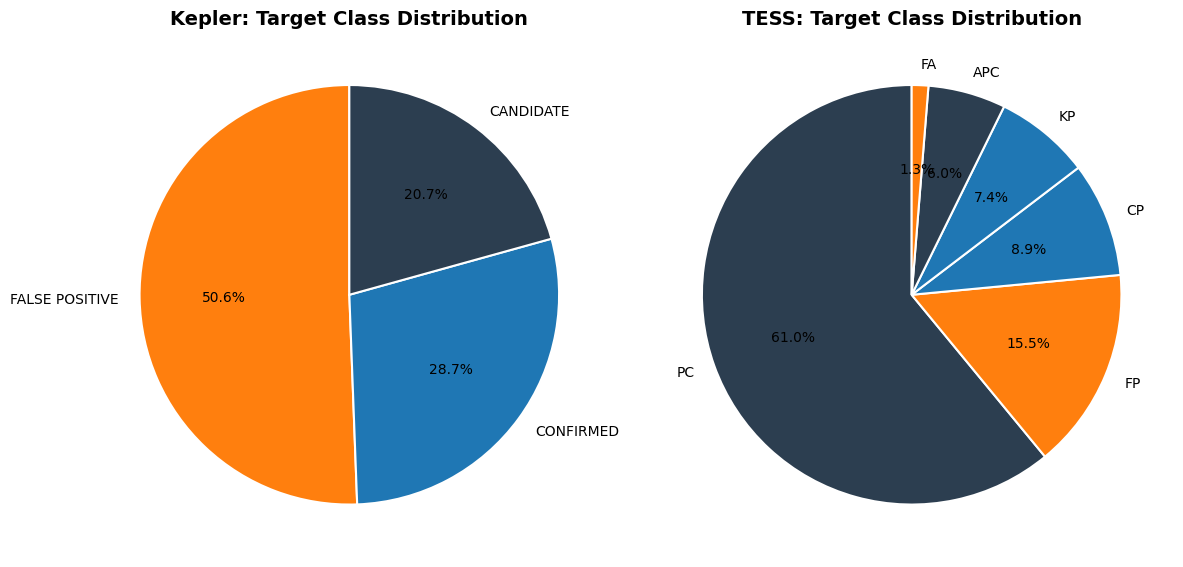

In [284]:
# عد القيم لكل ملف
kepler_counts = KEPLER_FILE['koi_disposition'].value_counts()
tess_counts   = TESS_FILE['tfopwg_disp'].value_counts()

# إعداد الشكل العام
plt.figure(figsize=(12,6))

# 🎯 Pie Chart لـ Kepler
plt.subplot(1, 2, 1)
plt.pie(
    kepler_counts,
    labels=kepler_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=get_colors(kepler_counts, 'Kepler'),
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}
)
plt.title('Kepler: Target Class Distribution', fontsize=14, fontweight='bold')

# 🎯 Pie Chart لـ TESS
plt.subplot(1, 2, 2)
plt.pie(
    tess_counts,
    labels=tess_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=get_colors(tess_counts, 'TESS'),
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}
)
plt.title('TESS: Target Class Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


# **Data**

### TESS

In [342]:
INPUT_CSV ="/content/TOI_2025.09.19_04.10.17.csv"
print("exists(INPUT_CSV) =", os.path.exists(INPUT_CSV))

exists(INPUT_CSV) = True


In [343]:
with open(INPUT_CSV, "r", errors="replace") as f:
    lines = f.readlines()
# COLUMN <name>: description
colnames = []
for L in lines:
    m = re.search(r"#\s*COLUMN\s+(\S+)\s*:", L)
    if m:
        colnames.append(m.group(1))
df = pd.read_csv(INPUT_CSV, comment="#", header=0, engine="python", names=colnames)

In [344]:
df.shape

(7668, 86)

In [345]:
len(colnames)

86

In [346]:
df.head()

,toi,toipfx,tid,ctoi_alias,pl_pnum,tfopwg_disp,rastr,ra,raerr1,raerr2,decstr,dec,decerr1,decerr2,st_pmra,st_pmraerr1,st_pmraerr2,st_pmralim,st_pmrasymerr,st_pmdec,st_pmdecerr1,st_pmdecerr2,st_pmdeclim,st_pmdecsymerr,pl_tranmid,pl_tranmiderr1,pl_tranmiderr2,pl_tranmidlim,pl_tranmidsymerr,pl_orbper,pl_orbpererr1,pl_orbpererr2,pl_orbperlim,pl_orbpersymerr,pl_trandurh,pl_trandurherr1,pl_trandurherr2,pl_trandurhlim,pl_trandurhsymerr,pl_trandep,pl_trandeperr1,pl_trandeperr2,pl_trandeplim,pl_trandepsymerr,pl_rade,pl_radeerr1,pl_radeerr2,pl_radelim,pl_radesymerr,pl_insol,pl_insolerr1,pl_insolerr2,pl_insollim,pl_insolsymerr,pl_eqt,pl_eqterr1,pl_eqterr2,pl_eqtlim,pl_eqtsymerr,st_tmag,st_tmagerr1,st_tmagerr2,st_tmaglim,st_tmagsymerr,st_dist,st_disterr1,st_disterr2,st_distlim,st_distsymerr,st_teff,st_tefferr1,st_tefferr2,st_tefflim,st_teffsymerr,st_logg,st_loggerr1,st_loggerr2,st_logglim,st_loggsymerr,st_rad,st_raderr1,st_raderr2,st_radlim,st_radsymerr,toi_created,rowupdate
1,1000.01,1000,50365310,5.036531e+07,1,FP,07h29m25.85s,112.357708,NaN,NaN,-12d41m45.46s,-12.695960,NaN,NaN,-5.964,0.085,-0.085,0.0,1.0,-0.076,0.072,-0.072,0.0,1.0,2.459230e+06,0.001657,-0.001657,0,1,2.171348,0.000264,-0.000264,0,1,2.01722,0.319588,-0.319588,0,1,656.886099,37.778210,-37.778210,0,1,5.818163,1.910546,-1.910546,0,1,22601.948581,NaN,NaN,NaN,NaN,3127.204052,NaN,NaN,NaN,NaN,9.604000,0.013,-0.013,0,1,485.735,11.9515,-11.9515,0,1,10249.0,264.7,-264.7,0,1,4.19,0.07,-0.07,0,1,2.16986,0.072573,-0.072573,0,1,2019-07-24 15:58:33,2024-09-09 10:08:01
2,1001.01,1001,88863718,8.886372e+07,1,PC,08h10m19.31s,122.580465,NaN,NaN,-05d30m49.87s,-5.513852,NaN,NaN,-4.956,0.102,-0.102,0.0,1.0,-15.555,0.072,-0.072,0.0,1.0,2.459988e+06,0.001916,-0.001916,0,1,1.931646,0.000005,-0.000005,0,1,3.16600,0.647000,-0.647000,0,1,1286.000000,1186.490000,-1186.490000,0,1,11.215400,2.624200,-2.624200,0,1,44464.500000,NaN,NaN,NaN,NaN,4045.000000,NaN,NaN,NaN,NaN,9.423440,0.006,-0.006,0,1,295.862,5.9100,-5.9100,0,1,7070.0,126.4,-126.4,0,1,4.03,0.09,-0.09,0,1,2.01000,0.090000,-0.090000,0,1,2019-07-24 15:58:33,2023-04-03 14:31:04
3,1002.01,1002,124709665,1.247097e+08,1,FP,06h58m54.47s,104.726966,NaN,NaN,-10d34m49.64s,-10.580455,NaN,NaN,-1.462,0.206,-0.206,0.0,1.0,-2.249,0.206,-0.206,0.0,1.0,2.459225e+06,0.000625,-0.000625,0,1,1.867557,0.000003,-0.000003,0,1,1.40800,0.184000,-0.184000,0,1,1500.000000,1.758400,-1.758400,0,1,23.752900,NaN,NaN,0,1,2860.610000,NaN,NaN,NaN,NaN,2037.000000,NaN,NaN,NaN,NaN,9.299501,0.058,-0.058,0,1,943.109,106.3330,-106.3330,0,1,8924.0,124.0,-124.0,0,1,NaN,NaN,NaN,0,1,5.73000,NaN,NaN,0,1,2019-07-24 15:58:33,2022-07-11 16:02:02
4,1003.01,1003,106997505,1.069975e+08,1,FP,07h22m14.39s,110.559945,NaN,NaN,-25d12m25.26s,-25.207017,NaN,NaN,-0.939,0.041,-0.041,0.0,1.0,1.640,0.055,-0.055,0.0,1.0,2.458493e+06,0.005350,-0.005350,0,1,2.743230,0.001080,-0.001080,0,1,3.16700,0.642000,-0.642000,0,1,383.410000,0.781988,-0.781988,0,1,NaN,NaN,NaN,0,1,1177.360000,NaN,NaN,NaN,NaN,1631.000000,NaN,NaN,NaN,NaN,9.300300,0.037,-0.037,0,1,7728.170,1899.5700,-1899.5700,0,1,5388.5,567.0,-567.0,0,1,4.15,1.64,-1.64,0,1,NaN,NaN,NaN,0,1,2019-07-24 15:58:33,2022-02-23 10:10:02
5,1004.01,1004,238597883,2.385979e+08,1,FP,08h08m42.77s,122.178195,NaN,NaN,-48d48m10.12s,-48.802811,NaN,NaN,-4.496,0.069,-0.069,0.0,1.0,9.347,0.062,-0.062,0.0,1.0,2.459987e+06,0.003748,-0.003748,0,1,3.573014,0.000013,-0.000013,0,1,3.37000,1.029000,-1.029000,0,1,755.000000,1306.550000,-1306.550000,0,1,11.311300,3.247140,-3.247140,0,1,54679.300000,NaN,NaN,NaN,NaN,4260.000000,NaN,NaN,NaN,NaN,9.135500,0.006,-0.006,0,1,356.437,4.6175,-4.6175,0,1,9219.0,171.1,-171.1,0,1,4.14,0.07,-0.07,0,1,2.15000,0.060000,-0.060000,0,1,2019-07-24 15:58:33,2024-09-09 10:08:01


In [347]:
df["y"] = df["tfopwg_disp"].map({
    "KP": 1, "CP": 1,   # True
    "FP": 0, "FA": 0    # False
})

df_train = df[df["y"].notna()].copy()

numeric_df = df_train.select_dtypes(include=["int64", "float64"])

correlation_matrix = numeric_df.corr().abs()
y_correlation = correlation_matrix["y"].sort_values(ascending=False)

print("\n--- الخطوة 1: تحليل الارتباط (Absolute Correlation with Target) ---")
print("أعلى 15 ميزة ارتباطاً بالهدف (y):")
print(y_correlation.head(16).round(4).astype(str))



--- الخطوة 1: تحليل الارتباط (Absolute Correlation with Target) ---
أعلى 15 ميزة ارتباطاً بالهدف (y):
y                     1.0
pl_eqt             0.3964
st_teff            0.2807
st_logg            0.2761
pl_trandurherr1     0.232
pl_trandurherr2     0.232
st_dist             0.221
st_raderr2         0.2086
st_raderr1         0.2086
pl_insol           0.1994
pl_pnum            0.1857
st_pmdecerr2       0.1561
st_pmdecerr1       0.1561
st_rad             0.1536
st_pmraerr2        0.1533
st_pmraerr1        0.1533
Name: y, dtype: object


In [348]:
TESS_STRONG_FEATURES = [
    'pl_eqt',
    'st_teff',
    'st_logg',
    'pl_trandurherr1',
    'pl_trandurherr2',
    'st_dist',
    'st_raderr2',
    'st_raderr1',
    'pl_insol',
    'pl_pnum',
    'st_pmdecerr2',
    'st_pmdecerr1',
    'st_rad',
    'st_pmraerr2',
    'st_pmraerr1',
    'pl_trandep',
    'pl_rade'
]

In [349]:
TESS_STRONG_FEATURES = list(dict.fromkeys(TESS_STRONG_FEATURES))

X_full = df_train[TESS_STRONG_FEATURES].copy()
y_full = df_train["y"].astype(int)

imputer = IterativeImputer(random_state=42)
scaler = StandardScaler()

X_full = pd.DataFrame(
    imputer.fit_transform(X_full),
    columns=TESS_STRONG_FEATURES,
    index=X_full.index
)

X_full = pd.DataFrame(
    scaler.fit_transform(X_full),
    columns=TESS_STRONG_FEATURES,
    index=X_full.index
)

X_train, X_test, y_train, y_test = train_test_split(
    X_full, y_full, test_size=0.25, random_state=42, stratify=y_full
)

In [356]:
models = {
    "Neural Network (MLP)": MLPClassifier(
        hidden_layer_sizes=(64, 32), max_iter=500, random_state=42
    ),
    "HistGradientBoosting": HistGradientBoostingClassifier(
        max_iter=500, random_state=42
    ),
    "Logistic Regression": LogisticRegression(
        max_iter=1000, random_state=42, class_weight="balanced"
    ),
    "XGBoost": xgb.XGBClassifier(
        objective="binary:logistic",
        use_label_encoder=False,
        eval_metric="logloss",
        random_state=42,
        n_estimators=300,
        max_depth=4,
        learning_rate=0.1,
        reg_lambda=0.5,
        scale_pos_weight=ratio
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=300, max_depth=10, random_state=42, class_weight="balanced"
    )
}

results_tess = {}

for name, model in models.items():
    print(f"\n🔹 Training {name} ...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    cm = confusion_matrix(y_test, y_pred)

    results_tess[name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1,
        "Confusion Matrix": cm
    }

    print(f"\n✅ {name} Results:")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))



🔹 Training Neural Network (MLP) ...

✅ Neural Network (MLP) Results:
Accuracy:  0.8186
Precision: 0.8101
Recall:    0.8232
F1-score:  0.8166
Confusion Matrix:
[[263  60]
 [ 55 256]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       323
           1       0.81      0.82      0.82       311

    accuracy                           0.82       634
   macro avg       0.82      0.82      0.82       634
weighted avg       0.82      0.82      0.82       634


🔹 Training HistGradientBoosting ...

✅ HistGradientBoosting Results:
Accuracy:  0.8312
Precision: 0.8269
Recall:    0.8296
F1-score:  0.8283
Confusion Matrix:
[[269  54]
 [ 53 258]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       323
           1       0.83      0.83      0.83       311

    accuracy                           0.83       634
   macro avg       0.83      0.83      0.

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:25:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



✅ XGBoost Results:
Accuracy:  0.8170
Precision: 0.7893
Recall:    0.8553
F1-score:  0.8210
Confusion Matrix:
[[252  71]
 [ 45 266]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       323
           1       0.79      0.86      0.82       311

    accuracy                           0.82       634
   macro avg       0.82      0.82      0.82       634
weighted avg       0.82      0.82      0.82       634


🔹 Training Random Forest ...

✅ Random Forest Results:
Accuracy:  0.8202
Precision: 0.8012
Recall:    0.8424
F1-score:  0.8213
Confusion Matrix:
[[258  65]
 [ 49 262]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       323
           1       0.80      0.84      0.82       311

    accuracy                           0.82       634
   macro avg       0.82      0.82      0.82       634
weighted avg       0.82      0.82      0.82       6

In [358]:
# ✅ تحويل نتائج TESS إلى DataFrame
results_tess_df = pd.DataFrame([
    {
        "Model": name,
        "Accuracy": metrics["Accuracy"],
        "Precision": metrics["Precision"],
        "Recall": metrics["Recall"],
        "F1-score": metrics["F1"]
    }
    for name, metrics in results_tess.items()
])

# ✅ ترتيب الجدول حسب أعلى F1-score
results_tess_df_sorted = results_tess_df.sort_values(by="F1-score", ascending=False)

# ✅ عرض الجدول بتنسيق جميل
results_tess_df_sorted.style \
    .background_gradient(subset=['Accuracy'], cmap='Blues') \
    .background_gradient(subset=['F1-score'], cmap='Greens') \
    .set_properties(**{'font-size': '15pt', 'text-align': 'center'}) \
    .set_table_styles([
        {'selector': 'th', 'props': [('font-size', '18pt'), ('text-align', 'center')]},
        {'selector': 'caption', 'props': [('caption-side', 'top'),
                                          ('font-size', '24pt'),
                                          ('font-weight', 'bold')]},
    ]) \
    .set_caption("TESS Machine Learning Models Performance") \
    .hide(axis="index")



Model,Accuracy,Precision,Recall,F1-score
HistGradientBoosting,0.831230,0.826923,0.829582,0.828250
Random Forest,0.820189,0.801223,0.842444,0.821317
XGBoost,0.817035,0.789318,0.855305,0.820988
Neural Network (MLP),0.818612,0.810127,0.823151,0.816587
Logistic Regression,0.760252,0.727794,0.816720,0.769697


In [294]:
best_model_name = max(results_tess, key=lambda x: results[x]["F1"])
best_model_metrics = results_tess[best_model_name]

print(f"Model : {best_model_name}")
print(f"Accuracy : {best_model_metrics['Accuracy']:.4f}")
print(f"Precision: {best_model_metrics['Precision']:.4f}")
print(f"Recall   : {best_model_metrics['Recall']:.4f}")
print(f"F1-score : {best_model_metrics['F1']:.4f}")
print("Confusion Matrix:")
print(best_model_metrics['Confusion Matrix'])

Model : HistGradientBoosting
Accuracy : 0.8312
Precision: 0.8269
Recall   : 0.8296
F1-score : 0.8283
Confusion Matrix:
[[269  54]
 [ 53 258]]


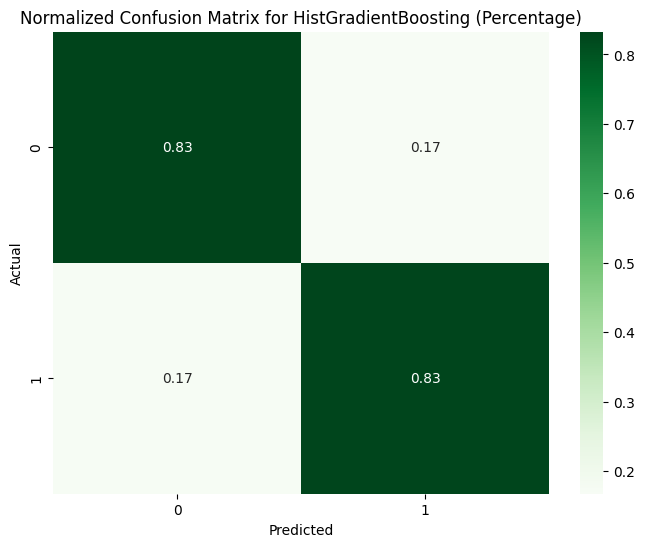

In [295]:
cm = best_model_metrics['Confusion Matrix']

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8,6))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Normalized Confusion Matrix for {best_model_name} (Percentage)')
plt.show()

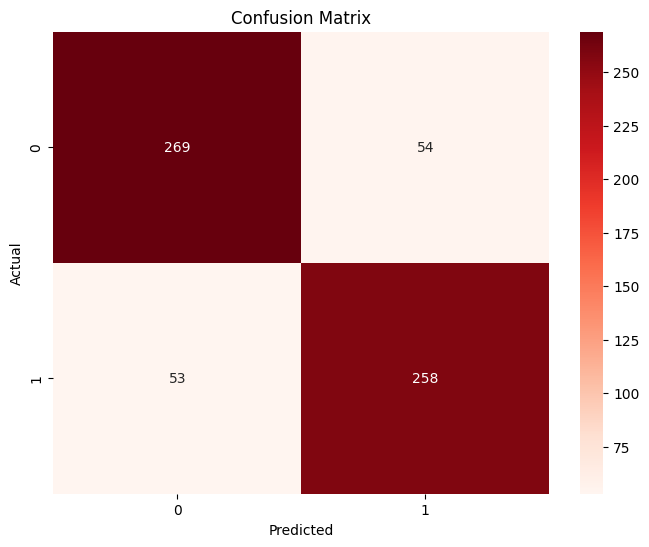

In [296]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [297]:
df_candidates = df[df["y"].isna()].copy()
X_candidates = df_candidates[TESS_STRONG_FEATURES].copy()
X_candidates = pd.DataFrame(
    imputer.transform(X_candidates),
    columns=TESS_STRONG_FEATURES,
    index=X_candidates.index
)

X_candidates = pd.DataFrame(
    scaler.transform(X_candidates),
    columns=TESS_STRONG_FEATURES,
    index=X_candidates.index
)

y_candidates_pred = models[best_model_name].predict(X_candidates)

df_candidates["Predicted"] = y_candidates_pred
df_candidates["Predicted_label"] = df_candidates["Predicted"].map({1: "True", 0: "False"})

print(df_candidates[["Predicted_label"]].head())

   Predicted_label
2            False
8            False
10           False
13           False
14           False


In [298]:
counts = df_candidates["Predicted_label"].value_counts()

print("True:", counts.get("True", 0))
print("False:", counts.get("False", 0))


True: 2254
False: 2880


### Kepler

In [299]:
pd.set_option('display.max_columns', None)

df_kepler = pd.read_csv('/content/cumulative_2025.09.19_04.10.46.csv', comment='#', skipinitialspace=True)
df_kepler.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_vet_stat,koi_vet_date,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_disp_prov,koi_comment,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,koi_time0,koi_time0_err1,koi_time0_err2,koi_eccen,koi_eccen_err1,koi_eccen_err2,koi_longp,koi_longp_err1,koi_longp_err2,koi_impact,koi_impact_err1,koi_impact_err2,koi_duration,koi_duration_err1,koi_duration_err2,koi_ingress,koi_ingress_err1,koi_ingress_err2,koi_depth,koi_depth_err1,koi_depth_err2,koi_ror,koi_ror_err1,koi_ror_err2,koi_srho,koi_srho_err1,koi_srho_err2,koi_fittype,koi_prad,koi_prad_err1,koi_prad_err2,koi_sma,koi_sma_err1,koi_sma_err2,koi_incl,koi_incl_err1,koi_incl_err2,koi_teq,koi_teq_err1,koi_teq_err2,koi_insol,koi_insol_err1,koi_insol_err2,koi_dor,koi_dor_err1,koi_dor_err2,koi_limbdark_mod,koi_ldm_coeff4,koi_ldm_coeff3,koi_ldm_coeff2,koi_ldm_coeff1,koi_parm_prov,koi_max_sngle_ev,koi_max_mult_ev,koi_model_snr,koi_count,koi_num_transits,koi_tce_plnt_num,koi_tce_delivname,koi_quarters,koi_bin_oedp_sig,koi_trans_mod,koi_model_dof,koi_model_chisq,koi_datalink_dvr,koi_datalink_dvs,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_smet,koi_smet_err1,koi_smet_err2,koi_srad,koi_srad_err1,koi_srad_err2,koi_smass,koi_smass_err1,koi_smass_err2,koi_sage,koi_sage_err1,koi_sage_err2,koi_sparprov,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag,koi_fwm_stat_sig,koi_fwm_sra,koi_fwm_sra_err,koi_fwm_sdec,koi_fwm_sdec_err,koi_fwm_srao,koi_fwm_srao_err,koi_fwm_sdeco,koi_fwm_sdeco_err,koi_fwm_prao,koi_fwm_prao_err,koi_fwm_pdeco,koi_fwm_pdeco_err,koi_dicco_mra,koi_dicco_mra_err,koi_dicco_mdec,koi_dicco_mdec_err,koi_dicco_msky,koi_dicco_msky_err,koi_dikco_mra,koi_dikco_mra_err,koi_dikco_mdec,koi_dikco_mdec_err,koi_dikco_msky,koi_dikco_msky_err
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,Done,2018-08-16,CANDIDATE,1.000,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,-0.002160,2455003.539,0.002160,-0.002160,0.0,NaN,NaN,NaN,NaN,NaN,0.146,0.318,-0.146,2.95750,0.08190,-0.08190,NaN,NaN,NaN,615.8,19.5,-19.5,0.022344,0.000832,-0.000528,3.20796,0.33173,-1.09986,LS+MCMC,2.26,0.26,-0.15,0.0853,NaN,NaN,89.66,NaN,NaN,793.0,NaN,NaN,93.59,29.45,-16.65,24.810,2.600,-2.600,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,5.135849,28.470820,35.8,2,142.0,1.0,q1_q17_dr25_tce,11111111111111111000000000000000,0.6864,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-001-2016...,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.14,0.15,-0.15,0.927,0.105,-0.061,0.919,0.052,-0.046,NaN,NaN,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,15.114,15.006,14.082,13.751,13.648,0.002,19.462294,1.400000e-05,48.14191,0.000130,0.430,0.510,0.940,0.480,-0.00020,0.00032,-0.00055,0.00031,-0.010,0.130,0.200,0.160,0.200,0.170,0.080,0.130,0.310,0.170,0.320,0.160
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,Done,2018-08-16,CANDIDATE,0.969,0,0,0,0,q1_q17_dr25_sup_koi,NO_COMMENT,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,-0.003520,2454995.514,0.003520,-0.003520,0.0,NaN,NaN,NaN,NaN,NaN,0.586,0.059,-0.443,4.50700,0.11600,-0.11600,NaN,NaN,NaN,874.8,35.5,-35.5,0.027954,0.009078,-0.001347,3.02368,2.20489,-2.49638,LS+MCMC,2.83,0.32,-0.19,0.2734,NaN,NaN,89.57,NaN,NaN,443.0,NaN,NaN,9.11,2.87,-1.62,77.900,28.400,-28.400,Claret (2011 A&A 529 75) ATLAS LS,0.0,0.0,0.2291,0.4603,q1_q17_dr25_koi,7.027669,20.109507,25.8,2,25.0,2.0,q1_q17_dr25_tce,11111111111111111000000000000000,0.0023,Mandel and Agol (2002 ApJ 580 171),NaN,NaN,010/010797/010797460/dv/kplr010797460-20160209...,010/010797/010797460/dv/kplr010797460-002-2016...,5455.0,81.0,-81.0,4.467,0.064,-0.096,0.14,0.15,-0.15,0.927,0.105,-0.061,0.919,0.052,-0.046,NaN,NaN,NaN,q1_q17_dr25_stellar,291.93423,48.141651,15.347,15.890,15.270,1

In [300]:
print(df_kepler['koi_disposition'].value_counts())

koi_disposition
FALSE POSITIVE    4839
CONFIRMED         2746
CANDIDATE         1979
Name: count, dtype: int64


In [302]:
df_train = df_kepler[
    df_kepler['koi_disposition'].isin(['CONFIRMED', 'FALSE POSITIVE'])
].copy()
df_train['y'] = df_train['koi_disposition'].apply(
    lambda x: 1 if x == 'CONFIRMED' else 0
)

In [303]:
PURE_PHYSICAL_FEATURES = [
'koi_count' ,
'koi_smet_err2',
'koi_smet_err1' ,
'koi_steff_err1' ,
'koi_dicco_msky'  ,
'koi_steff_err2'   ,
'koi_dikco_msky'    ,
'koi_smass_err1'    ,
'koi_smet'          ,
'koi_incl'          ,
'koi_slogg_err2' ,
'koi_teq',
'koi_period',
'koi_duration',
'koi_prad',
'koi_model_snr',
'koi_depth',
]

In [305]:
df_kepler = KEPLER_FILE.copy()
df_train = df_kepler[
df_kepler['koi_disposition'].isin(['CONFIRMED', 'FALSE POSITIVE'])
].copy()
df_train['y'] = df_train['koi_disposition'].apply(lambda x: 1 if x == 'CONFIRMED' else 0)

X_full_pure = df_train[PURE_PHYSICAL_FEATURES].copy()
y_full = df_train['y'].astype(int)

In [306]:
LOG_TRANSFORM_COLS = ['koi_period', 'koi_prad', 'koi_depth', 'koi_model_snr']
for col in LOG_TRANSFORM_COLS:
    if col in X_full_pure.columns:
       X_full_pure[col] = X_full_pure[col].apply(lambda x: np.log1p(x) if pd.notna(x) else x)

numeric_cols_to_process = [col for col in X_full_pure.columns if X_full_pure[col].dtype in [np.float64, np.int64]]

imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

X_full_pure[numeric_cols_to_process] = imputer.fit_transform(X_full_pure[numeric_cols_to_process])
X_full_pure[numeric_cols_to_process] = scaler.fit_transform(X_full_pure[numeric_cols_to_process])

In [327]:
X_train, X_test, y_train, y_test = train_test_split(
    X_full_pure, y_full, test_size=0.2, random_state=42, stratify=y_full
)

num_neg = sum(y_train == 0)
num_pos = sum(y_train == 1)
ratio = num_neg / num_pos

models = {
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42),
    "HistGradientBoosting": HistGradientBoostingClassifier(max_iter=500, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, class_weight="balanced"),
    "XGBoost": xgb.XGBClassifier(
        objective="binary:logistic",
        use_label_encoder=False,
        eval_metric="logloss",
        random_state=42,
        n_estimators=300,
        max_depth=4,
        learning_rate=0.1,
        reg_lambda=0.5,
        scale_pos_weight=ratio
    ),
    "Random Forest": RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42, class_weight="balanced")
}

results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name} ...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1,
        "Confusion Matrix": cm
    }

    print(f"\n✅ {name} Results:")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))



🔹 Training Neural Network (MLP) ...

✅ Neural Network (MLP) Results:
Accuracy:  0.9585
Precision: 0.9386
Recall:    0.9472
F1-score:  0.9429
Confusion Matrix:
[[934  34]
 [ 29 520]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       968
           1       0.94      0.95      0.94       549

    accuracy                           0.96      1517
   macro avg       0.95      0.96      0.96      1517
weighted avg       0.96      0.96      0.96      1517


🔹 Training HistGradientBoosting ...

✅ HistGradientBoosting Results:
Accuracy:  0.9763
Precision: 0.9672
Recall:    0.9672
F1-score:  0.9672
Confusion Matrix:
[[950  18]
 [ 18 531]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       968
           1       0.97      0.97      0.97       549

    accuracy                           0.98      1517
   macro avg       0.97      0.97      0.

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:01:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



✅ XGBoost Results:
Accuracy:  0.9743
Precision: 0.9586
Recall:    0.9709
F1-score:  0.9647
Confusion Matrix:
[[945  23]
 [ 16 533]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       968
           1       0.96      0.97      0.96       549

    accuracy                           0.97      1517
   macro avg       0.97      0.97      0.97      1517
weighted avg       0.97      0.97      0.97      1517


🔹 Training Random Forest ...

✅ Random Forest Results:
Accuracy:  0.9697
Precision: 0.9467
Recall:    0.9709
F1-score:  0.9586
Confusion Matrix:
[[938  30]
 [ 16 533]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       968
           1       0.95      0.97      0.96       549

    accuracy                           0.97      1517
   macro avg       0.96      0.97      0.97      1517
weighted avg       0.97      0.97      0.97      15

In [336]:
# ✅ تحويل القاموس إلى DataFrame
results_df = pd.DataFrame([
    {
        "Model": name,
        "Accuracy": metrics["Accuracy"],
        "Precision": metrics["Precision"],
        "Recall": metrics["Recall"],
        "F1-score": metrics["F1"]
    }
    for name, metrics in results.items()
])

# ✅ ترتيب الجدول حسب أعلى F1-score
results_df_sorted = results_df.sort_values(by="F1-score", ascending=False)

# ✅ عرض الجدول بنفس تنسيقك الجميل
results_df_sorted.style \
    .background_gradient(subset=['Accuracy'], cmap='Blues') \
    .background_gradient(subset=['F1-score'], cmap='Greens') \
    .set_properties(**{'font-size': '15pt', 'text-align': 'center'}) \
    .set_table_styles([
        {'selector': 'th', 'props': [('font-size', '18pt'), ('text-align', 'center')]},
        {'selector': 'caption', 'props': [('caption-side', 'top'),
                                          ('font-size', '24pt'),
                                          ('font-weight', 'bold')]}
    ]) \
    .set_caption("Comparing Machine Learning Models Performance for Kepler") \
    .hide(axis="index")


Model,Accuracy,Precision,Recall,F1-score
HistGradientBoosting,0.976269,0.967213,0.967213,0.967213
XGBoost,0.974291,0.958633,0.970856,0.964706
Random Forest,0.969677,0.946714,0.970856,0.958633
Neural Network (MLP),0.958471,0.938628,0.947177,0.942883
Logistic Regression,0.928807,0.868114,0.947177,0.905923


In [328]:
best_model_name = max(results, key=lambda x: results[x]["F1"])
best_model_metrics1 = results[best_model_name]

print(f"Model : {best_model_name}")
print(f"Accuracy : {best_model_metrics1['Accuracy']:.4f}")
print(f"Precision: {best_model_metrics1['Precision']:.4f}")
print(f"Recall   : {best_model_metrics1['Recall']:.4f}")
print(f"F1-score : {best_model_metrics1['F1']:.4f}")
print("Confusion Matrix:")
print(best_model_metrics1['Confusion Matrix'])

Model : HistGradientBoosting
Accuracy : 0.9763
Precision: 0.9672
Recall   : 0.9672
F1-score : 0.9672
Confusion Matrix:
[[950  18]
 [ 18 531]]


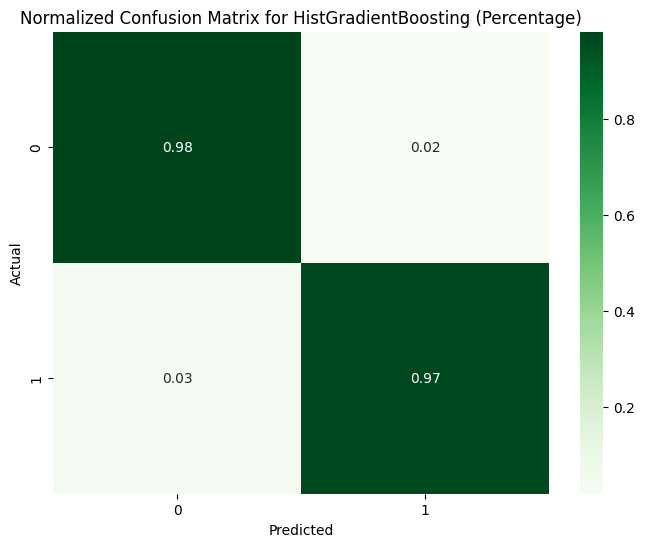

In [329]:
c = best_model_metrics1['Confusion Matrix']

cm_normalized = c.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8,6))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Normalized Confusion Matrix for {best_model_name} (Percentage)')
plt.show()

In [310]:
df_kepler['koi_disposition'] = df_kepler['koi_disposition'].str.strip().str.upper()
df_candidates = df_kepler[df_kepler['koi_disposition'].isin(['CANDIDATE'])].copy()
print(f"Number of candidates to classify: {len(df_candidates)}")

X_candidates = df_candidates[PURE_PHYSICAL_FEATURES].copy()

# Log transform
LOG_TRANSFORM_COLS = ['koi_period', 'koi_prad', 'koi_depth', 'koi_model_snr']
for col in LOG_TRANSFORM_COLS:
    if col in X_candidates.columns:
        X_candidates[col] = X_candidates[col].apply(lambda x: np.log1p(x) if pd.notna(x) else x)

# Imputer + Scaler
X_candidates[numeric_cols_to_process] = imputer.transform(X_candidates[numeric_cols_to_process])
X_candidates[numeric_cols_to_process] = scaler.transform(X_candidates[numeric_cols_to_process])

best_model = models[best_model_name]

y_candidates_pred = best_model.predict(X_candidates)

y_candidates_labels = np.where(y_candidates_pred == 1, "TRUE", "FALSE")
df_candidates['Predicted'] = y_candidates_labels

df_candidates[['koi_disposition'] + PURE_PHYSICAL_FEATURES + ['Predicted']].head(10)


Number of candidates to classify: 1979


,koi_disposition,koi_count,koi_smet_err2,koi_smet_err1,koi_steff_err1,koi_dicco_msky,koi_steff_err2,koi_dikco_msky,koi_smass_err1,koi_smet,koi_incl,koi_slogg_err2,koi_teq,koi_period,koi_duration,koi_prad,koi_model_snr,koi_depth,Predicted
2,CANDIDATE,1,-0.30,0.30,158.0,0.042,-176.0,0.027,0.110,-0.18,88.96,-0.176,638.0,19.899140,1.7822,14.60,76.3,10829.0,FALSE
58,CANDIDATE,1,-0.30,0.35,179.0,0.057,-163.0,0.053,0.104,-0.54,89.05,-0.105,467.0,40.419504,3.3620,7.51,36.9,6256.0,TRUE
62,CANDIDATE,2,-0.15,0.15,79.0,0.710,-79.0,0.390,0.025,0.14,87.62,-0.064,734.0,7.240661,0.5580,19.45,13.7,556.4,TRUE
63,CANDIDATE,3,-0.15,0.15,104.0,0.050,-115.0,0.300,0.074,-0.06,84.62,-0.108,1272.0,3.435916,3.1330,0.55,8.7,23.2,TRUE
84,CANDIDATE,1,-0.30,0.30,179.0,0.009,-197.0,0.087,0.099,-0.52,85.87,-0.192,812.0,10.181584,3.5089,7.73,183.6,5741.1,FALSE
92,CANDIDATE,1,-0.15,0.15,76.0,0.913,-85.0,0.080,0.052,-0.10,89.66,-0.112,643.0,19.620347,2.0038,13.60,340.5,21725.0,TRUE
112,CANDIDATE,1,-0.30,0.30,166.0,0.074,-166.0,0.271,0.111,-0.16,88.92,-0.150,511.0,34.843986,2.9315,7.61,76.8,4523.6,TRUE
118,CANDIDATE,1,-0.20,0.30,205.0,0.098,-205.0,0.126,0.062,-1.66,19.01,-0.163,1155.0,4.640900,35.5120,30.09,296.9,2450.6,FALSE
123,CANDIDATE,1,-0.30,0.28,183.0,NaN,-219.0,NaN,0.121,-0.44,57.30,-0.272,1947.0,1.028437,1.8606,72.77,89.6,8098.0,FALSE
166,CANDIDATE,1,-0.15,0.15,85.0,0.056,-85.0,0.123,0.031,0.12,89.76,-0.018,188.0,235.998640,8.2284,10.59,271.8,20715.0,TRUE


# Combined Data

In [311]:
KEPLER_FILE = '/content/cumulative_2025.09.19_04.10.46.csv'
TESS_FILE = '/content/TOI_2025.09.19_04.10.17.csv'

In [312]:
# Defining the list of columns we will standardize
CORE_FEATURES_MAPPING = {
    'pl_orbper': ['koi_period', 'pl_orbper'], 'pl_orbpererr1': ['koi_period_err1', 'pl_orbpererr1'],
    'pl_trandep': ['koi_depth', 'pl_trandep'], 'pl_trandeperr1': ['koi_depth_err1', 'pl_trandeperr1'],
    'pl_rade': ['koi_prad', 'pl_rade'], 'pl_radeerr1': ['koi_prad_err1', 'pl_radeerr1'],
    'pl_eqt': ['koi_teq', 'pl_eqt'], 'pl_insol': ['koi_insol', 'pl_insol'],
    'st_teff': ['koi_steff', 'st_teff'], 'st_tefferr1': ['koi_steff_err1', 'st_tefferr1'],
    'st_logg': ['koi_slogg', 'st_logg'], 'st_loggerr1': ['koi_slogg_err1', 'st_loggerr1'],
    'st_rad': ['koi_srad', 'st_rad'], 'st_raderr1': ['koi_srad_err1', 'st_raderr1'],
    'st_mass': ['koi_smass', 'st_mass'],
    'ra': ['ra', 'ra'], 'dec': ['dec', 'dec'],
    'tfopwg_disp': ['koi_disposition', 'tfopwg_disp'],
    'fp_flag_co': ['koi_fpflag_co', ''], 'fp_flag_nt': ['koi_fpflag_nt', ''],
    'koi_model_snr': ['koi_model_snr', ''],
}

### load_clean_unify_and_split function

In [313]:
def load_clean_unify_and_split(file_path, mission_name):
    df = pd.read_csv(file_path, comment='#', skipinitialspace=True)
    df['mission'] = mission_name

    target_cols = ['mission', 'tfopwg_disp']
    rename_map = {}
    for unified_name, file_names in CORE_FEATURES_MAPPING.items():
        col_to_use = None
        if mission_name == 'Kepler' and file_names[0] in df.columns: col_to_use = file_names[0]
        elif mission_name == 'TESS' and file_names[1] in df.columns: col_to_use = file_names[1]

        #Special Correction for the Classification Column Name in TESS (if tfopwg_disp is missing)
        if unified_name == 'tfopwg_disp' and mission_name == 'TESS':
            if 'tfopwg_disp' in df.columns: col_to_use = 'tfopwg_disp'
            elif 'disposition' in df.columns:
                 col_to_use = 'disposition'; rename_map['disposition'] = 'tfopwg_disp'

        if col_to_use and col_to_use in df.columns:
            if col_to_use != unified_name: rename_map[col_to_use] = unified_name
            if unified_name not in target_cols: target_cols.append(unified_name)
        elif unified_name in df.columns and unified_name not in target_cols: target_cols.append(unified_name)
    df.rename(columns=rename_map, inplace=True)
    object_cols_to_drop = [col for col in df.columns if df[col].dtype == 'object' and col not in ['mission', 'tfopwg_disp']]
    df.drop(columns=object_cols_to_drop, errors='ignore', inplace=True)
    df_filtered = df[[col for col in target_cols if col in df.columns]].copy()

    if mission_name == 'Kepler':
        # CONFIRMED (y=1)
        confirmed_labels = ['CONFIRMED']
        # FALSE POSITIVE (y=0)
        false_labels = ['FALSE POSITIVE']
    else: # TESS
        # CONFIRMED: CP, KP (y=1)
        confirmed_labels = ['CP', 'KP']
        # FALSE POSITIVE: FA, FP (y=0)
        false_labels = ['FA', 'FP']
        # Candidate (PC, APC)

    df_train_y1 = df_filtered[df_filtered['tfopwg_disp'].isin(confirmed_labels)].copy(); df_train_y1['y'] = 1
    df_train_y0 = df_filtered[df_filtered['tfopwg_disp'].isin(false_labels)].copy(); df_train_y0['y'] = 0
    df_train = pd.concat([df_train_y1, df_train_y0], ignore_index=True)

    # Classification Set (everything not in the training list)
    all_train_labels = confirmed_labels + false_labels
    df_predict = df_filtered[~df_filtered['tfopwg_disp'].isin(all_train_labels)].copy()

    # إزالة عمود التصنيف الأصلي من المجموعتين
    df_train.drop(columns=['tfopwg_disp'], errors='ignore', inplace=True)
    df_predict.drop(columns=['tfopwg_disp'], errors='ignore', inplace=True)

    return df_train, df_predict

In [314]:
df_kepler_train, df_kepler_predict = load_clean_unify_and_split(KEPLER_FILE, "Kepler")
df_tess_train, df_tess_predict = load_clean_unify_and_split(TESS_FILE, "TESS")

# 1. CONFIRMED vs FALSE POSITIVE
df_train_combined = pd.concat([df_tess_train, df_kepler_train], ignore_index=True)
# 2. CANDIDATE
df_predict_combined = pd.concat([df_tess_predict, df_kepler_predict], ignore_index=True)

In [315]:
print(f"Total Size: {len(df_train_combined) + len(df_predict_combined)} row.")
print(f"1. size train data CONFIRMED vs FALSE POSITIVE: {len(df_train_combined)} row .")
print(f"2. size CANDIDATE data  : {len(df_predict_combined)} row ")
print(f"NUM of featuers : {len(df_train_combined.columns) - 1}")
print(df_train_combined.columns.tolist())

Total Size: 17232 row.
1. size train data CONFIRMED vs FALSE POSITIVE: 10119 row .
2. size CANDIDATE data  : 7113 row 
NUM of featuers : 21
['mission', 'pl_orbper', 'pl_orbpererr1', 'pl_trandep', 'pl_trandeperr1', 'pl_rade', 'pl_radeerr1', 'pl_eqt', 'pl_insol', 'st_teff', 'st_tefferr1', 'st_logg', 'st_loggerr1', 'st_rad', 'st_raderr1', 'ra', 'dec', 'y', 'st_mass', 'fp_flag_co', 'fp_flag_nt', 'koi_model_snr']


## Clean Data

In [316]:
nan_percent = df_train_combined.isnull().sum() / len(df_train_combined) * 100

nan_report = nan_percent[nan_percent > 0].sort_values(ascending=False)
if nan_report.empty:
    print("There is no null values")
else:
    print("Top 15 columns with missing values and their percentage:")
    print(nan_report.head(11).round(2).astype(str) + '%')

Top 15 columns with missing values and their percentage:
koi_model_snr     27.6%
st_mass           27.6%
fp_flag_co       25.04%
fp_flag_nt       25.04%
st_loggerr1       9.52%
st_raderr1        7.88%
st_tefferr1       5.65%
pl_radeerr1       5.63%
st_logg           4.88%
pl_orbpererr1     3.85%
st_rad            3.84%
dtype: object


In [317]:
# --- (Skewness) ---
analysis_cols = [
    'pl_trandep',
    'pl_rade',
    'pl_eqt',
    'st_teff',
    'st_logg',
    'st_rad',
    'pl_insol'
]

skewness_report = df_train_combined[analysis_cols].skew().sort_values(ascending=False)
print(skewness_report.round(2))

pl_rade       61.91
pl_insol      51.45
st_rad        22.42
pl_trandep     5.40
st_teff        3.60
pl_eqt         2.99
st_logg       -3.25
dtype: float64


In [318]:
LOG_TRANSFORM_COLS = ['pl_rade', 'pl_insol', 'st_rad', 'pl_trandep']

for col in LOG_TRANSFORM_COLS:
    if col in df_train_combined.columns:
        df_train_combined[col] = df_train_combined[col].apply(lambda x: np.log1p(x) if pd.notna(x) else x)
        df_predict_combined[col] = df_predict_combined[col].apply(lambda x: np.log1p(x) if pd.notna(x) else x)

print("✅ Log Transformation applied to:", [c for c in LOG_TRANSFORM_COLS if c in df_train_combined.columns])

NUMERIC_COLS = df_train_combined.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'y' in NUMERIC_COLS:
    NUMERIC_COLS.remove('y')

# --- Imputation & Scaling ---
imputer = IterativeImputer(random_state=42, max_iter=10)
scaler = StandardScaler()

df_train_combined[NUMERIC_COLS] = imputer.fit_transform(df_train_combined[NUMERIC_COLS])
df_train_combined[NUMERIC_COLS] = scaler.fit_transform(df_train_combined[NUMERIC_COLS])

df_predict_combined[NUMERIC_COLS] = imputer.transform(df_predict_combined[NUMERIC_COLS])
df_predict_combined[NUMERIC_COLS] = scaler.transform(df_predict_combined[NUMERIC_COLS])

for df in [df_train_combined, df_predict_combined]:
    if 'mission' not in df.columns:
        df['mission'] = 'Unknown'

df_train_combined = pd.get_dummies(df_train_combined, columns=['mission'], prefix='mission', drop_first=True)
df_predict_combined = pd.get_dummies(df_predict_combined, columns=['mission'], prefix='mission', drop_first=True)

for col in df_train_combined.columns:
    if col not in df_predict_combined.columns:
        df_predict_combined[col] = 0
for col in df_predict_combined.columns:
    if col not in df_train_combined.columns:
        df_train_combined[col] = 0

print("✅ Preprocessing completed. Train & Predict columns are aligned.")


✅ Log Transformation applied to: ['pl_rade', 'pl_insol', 'st_rad', 'pl_trandep']
✅ Preprocessing completed. Train & Predict columns are aligned.


## Pipline

In [319]:
X = df_train_combined.drop(columns=['y'])
y = df_train_combined['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced"),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42,class_weight="balanced"),
    "Logistic Regression": LogisticRegression(max_iter=500, class_weight="balanced"),
    "HistGradientBoosting": HistGradientBoostingClassifier(max_iter=500,random_state=42,class_weight="balanced"),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(100,50), max_iter=300, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({"Model": name, "Accuracy": acc, "F1-score": f1})

results_df = pd.DataFrame(results)
print("\n--- Comparing Modeles---")
print(results_df.sort_values(by="F1-score", ascending=False))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:55:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "class_weight", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Comparing Modeles---
                  Model  Accuracy  F1-score
3  HistGradientBoosting  0.940711  0.925889
1               XGBoost  0.940711  0.925373
0         Random Forest  0.935968  0.919483
4  Neural Network (MLP)  0.928854  0.910537
2   Logistic Regression  0.862451  0.839038


In [332]:
# ترتيب النتائج حسب F1-score تنازليًا
results_df_sorted = results_df.sort_values(by="F1-score", ascending=False)

# عرض الجدول مع تدرج لوني وتكبير عناوين الأعمدة وCaption كبيرة وبولد
results_df_sorted.style \
    .background_gradient(subset=['Accuracy'], cmap='Blues') \
    .background_gradient(subset=['F1-score'], cmap='Greens') \
    .set_properties(**{'font-size': '15pt', 'text-align': 'center'}) \
    .set_table_styles([
        {'selector': 'th', 'props': [('font-size', '18pt'), ('text-align', 'center')]},  # تكبير العناوين
        {'selector': 'caption', 'props': [('caption-side', 'top'), ('font-size', '24pt'), ('font-weight', 'bold')]}  # Caption كبيرة وبولد
    ]) \
    .set_caption("Comparing Best Model") \
    .hide(axis="index")

Model,Accuracy,F1-score
HistGradientBoosting,0.940711,0.925889
XGBoost,0.940711,0.925373
Random Forest,0.935968,0.919483
Neural Network (MLP),0.928854,0.910537
Logistic Regression,0.862451,0.839038


In [325]:
# إيجاد القاموس اللي عنده أعلى F1-score
best_model = max(results, key=lambda x: x["F1-score"])

# استخراج القيم
best_model_name = best_model["Model"]
best_model_acc = best_model["Accuracy"]
best_model_f1 = best_model["F1-score"]

print(f"Best Model: {best_model_name}")
print(f"Accuracy: {best_model_acc:.4f}")
print(f"F1-score: {best_model_f1:.4f}")
print("Confusion Matrix:")
print(best_model_metrics['Confusion Matrix'])

Best Model: HistGradientBoosting
Accuracy: 0.9407
F1-score: 0.9259
Confusion Matrix:
[[950  18]
 [ 18 531]]


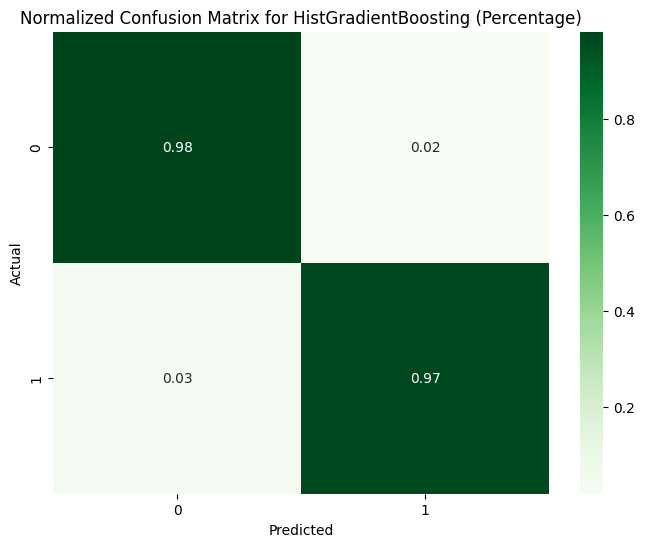

In [324]:
cn = best_model_metrics['Confusion Matrix']

cm_normalized = cn.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8,6))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Normalized Confusion Matrix for {best_model_name} (Percentage)')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(eval_metric="logloss", random_state=42)

param_grid_xgb = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.8, 1.0]
}

grid_xgb = GridSearchCV(xgb, param_grid_xgb, scoring="f1", cv=3, n_jobs=-1, verbose=1)
grid_xgb.fit(X_train, y_train)

print("Best parameter XGBoost:", grid_xgb.best_params_)
print("Best F1-score:", grid_xgb.best_score_)


In [ ]:
hgb = HistGradientBoostingClassifier(random_state=42)

param_grid_hgb = {
    "max_iter": [300, 500, 800],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [None, 10, 20]
}

grid_hgb = GridSearchCV(hgb, param_grid_hgb, scoring="f1", cv=3, n_jobs=-1, verbose=1)
grid_hgb.fit(X_train, y_train)

print("Best Parameter HGB:", grid_hgb.best_params_)
print("Best F1-score:", grid_hgb.best_score_)


## HistGradientBoostingClassifier

In [ ]:
X_train_full = df_train_combined.drop(columns=['y'])
y_train_full = df_train_combined['y'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42, stratify=y_train_full)

print(f"Train Data size: {len(X_train)}")
print(f"Test Data size : {len(X_test)}")

model_hgb = HistGradientBoostingClassifier(random_state=42, max_iter=500, class_weight='balanced')
model_hgb.fit(X_train, y_train)

y_pred_test = model_hgb.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_test):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

In [ ]:
X_predict = df_predict_combined.drop(columns=['y'], errors='ignore')

X_predict = X_predict.reindex(columns=X_train.columns, fill_value=0)

y_pred_predict = model_hgb.predict(X_predict)
y_proba_predict = model_hgb.predict_proba(X_predict)[:, 1]

# Adding the Results to the Classification DataFrame
df_predict_combined['Predicted_y'] = y_pred_predict
df_predict_combined['Planet_Probability'] = y_proba_predict

# 2. Analysis of Classification Results
num_predicted_planets = df_predict_combined['Predicted_y'].sum()
total_candidates = len(df_predict_combined)
percentage_planets = (num_predicted_planets / total_candidates) * 100

In [ ]:
print(f"Total number of classified candidates (CANDIDATE): {total_candidates}")
print(f"Number of candidates classified as planets (Predicted_y = 1): {num_predicted_planets}")
print(f"Percentage of candidates classified as planets: {percentage_planets:.2f}%")


In [ ]:
# 3. Permutation Importance
r = permutation_importance(
    model_hgb, X_test, y_test,
    n_repeats=10,
    random_state=42,
    scoring='accuracy'
)

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns[r.importances_mean.argsort()[::-1]],
    'Importance': r.importances_mean[r.importances_mean.argsort()[::-1]]
})

print("\n--- Top 10 Selected Features---")
print(feature_importance_df.head(10).round(4))